In [ ]:
# Test the working of the Jupyter notebook.

In [ ]:
print("Hello world!")

In [ ]:
# Opdracht 4.1: ZTDL 1 - First Deep Learning Model

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Hier worden de nodige bibliotheken geïmporteerd: NumPy voor numerieke berekeningen, 
# %matplotlib inline om ervoor te zorgen dat de grafieken binnen de notebook worden weergegeven, 
# en Matplotlib voor het maken van de grafieken.

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [ ]:
# De make_circles functie van Scikit-learn wordt gebruikt om een dataset te maken met cirkelvormige clusters. 
# De n_samples parameter bepaalt het aantal punten in de dataset, noise voegt ruis toe aan de gegevens 
# en factor bepaalt de afstand tussen de twee cirkels. random_state zorgt ervoor dat de gegenereerde gegevens herhaalbaar zijn.

In [ ]:
X

In [ ]:
# Dit geeft de gegevens X weer, die de coördinaten van de punten zijn.

In [ ]:
X.shape

In [ ]:
# Dit toont de vorm van de gegevens X, wat het aantal rijen en kolommen van de dataset weergeeft.

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [ ]:
# Hier worden de punten gevisualiseerd met Matplotlib. 
# De punten worden geplot als blauwe cirkels ('ob') en rode kruizen ('xr'). 
# De alpha parameter bepaalt de transparantie van de punten. 
# Vervolgens worden de grenzen van de plot ingesteld en een legende en titel toegevoegd.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Dense(4, input_shape=(2,), activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=20)

In [ ]:
# Nu begint het gedeelte dat een neuraal netwerk maakt en traint. 
# Eerst wordt een sequentiële model gedefinieerd. 
# Vervolgens worden de lagen van het model toegevoegd: 
# een invoerlaag met 2 neuronen (input_shape=(2,)), een verborgen laag met 4 neuronen en tanh activatiefunctie, 
# en een uitvoerlaag met 1 neuron en sigmoid activatiefunctie. 
# Het model wordt gecompileerd met Stochastic Gradient Descent (SGD) als optimizer en binair kruis-entropieverliesfunctie. 
# Het model wordt getraind op de gegevens X en y gedurende 20 epochs.

In [ ]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [ ]:
# Dit deel visualiseert de beslissingsgrens van het getrainde model. 
# Eerst worden roosterpunten gemaakt om te voorspellen met het model. 
# Vervolgens worden voorspellingen gedaan op deze roosterpunten en gevisualiseerd met een contourplot. 
# Daarna worden de originele punten geplot, net als eerder, maar nu bovenop de contourplot. 
# De legende en titel worden toegevoegd voor de plot.

In [ ]:
# Opdracht 4.2: ZTDL 2 - Data

In [ ]:
# STEF'S DEEL

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('Datasets/ifood_df.csv')

df.head()



In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.query("Kidhome > 1")

In [ ]:
df.sort_values('Kidhome', ascending = False).head()

In [ ]:
df['Income'].value_counts()

In [ ]:
df.groupby(['Kidhome', 'Teenhome'])['Income'].count()

In [ ]:
df['Income'].min()

In [ ]:
df['Income'].max()

In [ ]:
df['Income'].mean()

In [ ]:
df['Income'].median()

In [ ]:
df['Kidhome'] == 1
kidhome = df.corr()['Income'].sort_values()
kidhome

In [ ]:
df[['Income']].plot()

In [ ]:
df[['Income']].plot(style='.')

In [ ]:
df.plot(style='.', x='Age', y='Income')

In [ ]:
df[['Kidhome']].plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6);

In [ ]:
df[['Income']].plot(kind='kde');

In [ ]:
incomeMeasurement = df['Income'] > 40000
piecounts = incomeMeasurement.value_counts()
piecounts

In [ ]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.15],
               labels=['<= 40000', '> 40000'],
               autopct='%1.2f%%',
               shadow=True,
               startangle=90,
               fontsize=16);

In [ ]:
# GERT-JAN'S DEEL

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('Datasets/vehicle_population_statistics.csv')

df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.query("Cars > 100000")

In [ ]:
df.sort_values('Cars', ascending = True).head()

In [ ]:
df['Cars'].value_counts()

In [ ]:
df.groupby(['Kidhome', 'Teenhome'])['Income'].count()

In [ ]:
df['Cars'].min()

In [ ]:
df['Cars'].max()

In [ ]:
df['Cars'].mean()

In [ ]:
df['Cars'].median()

In [ ]:
df['Kidhome'] == 1
kidhome = df.corr()['Income'].sort_values()
kidhome

In [ ]:
df[['Income']].plot()

In [ ]:
df[['Income']].plot(style='.')

In [ ]:
df.plot(style='.', x='Age', y='Income')

In [ ]:
df[['Kidhome']].plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6);

In [ ]:
df[['Income']].plot(kind='kde');

In [ ]:
incomeMeasurement = df['Income'] > 40000
piecounts = incomeMeasurement.value_counts()
piecounts

In [ ]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.15],
               labels=['<= 40000', '> 40000'],
               autopct='%1.2f%%',
               shadow=True,
               startangle=90,
               fontsize=16);

In [ ]:
# Opdracht 4.3

In [ ]:
df = pd.read_csv('Datasets/car_data.csv')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
data = pd.read_csv('Datasets/car_data.csv')

In [ ]:
x = data['Kms_Driven'].values
y = data['Selling_Price'].values

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(1, input_shape=(1,)))

In [ ]:
model.summary()

In [ ]:
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [ ]:
model.fit(x, y, epochs=100)

In [ ]:
y_pred = model.predict(x)

In [ ]:
df.plot(kind='scatter', x='Kms_Driven', y='Selling_Price')

In [ ]:
plt.plot(df['Kms_Driven'], y_pred, color='red')
plt.title("Prediction")
plt.xlabel('Kilometers Driven')
plt.ylabel('Predicted Values')

In [ ]:
W, B = model.get_weights()

In [ ]:
W

In [ ]:
B

In [ ]:
# Opdracht 5.1

In [ ]:
from IPython.display import Image

In [ ]:
Image(filename = "Sketch Neural Network.png")

In [ ]:
# Een shallow model is een model met maar 1 laag. En dat kan alleen lineaire beslissingsgrenzen leren.
# Als de dataset dus niet-liniair is zal het model niet goed werken.
# Ook is het shallow model te simpel om ingewikkeldere patronen in data te herkennen.

In [ ]:
# Opdracht 5.2

In [ ]:
# Opdracht 5.3

## Multiclass classification

### The Iris dataset

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('Datasets/vehicle_population_statistics.csv')

df.head()

In [ ]:
df = pd.read_csv('Datasets/iris.csv')

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [ ]:
df.head()

In [ ]:
X = df.drop('species', axis=1)
X.head()

In [ ]:
target_names = df['species'].unique()
target_names

In [ ]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

In [ ]:
y= df['species'].map(target_dict)
y.head()

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat = to_categorical(y)

In [ ]:
y_cat[:10]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:5]

In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_class, y_pred_class))

In [ ]:
confusion_matrix(y_test_class, y_pred_class)

In [ ]:
Image(filename = "Opdr 5.3 Sketch.png")

In [ ]:
# Dit model heeft 1 hidden layer en een output layer.
# Er wordt hierbij softmax gebruikt omdat het de output van het netwerk omzet in waarschijnlijkheden over meerdere klassen.
# Dit is handig voor de iris dataset, waarbij elke sample tot 1 van de 3 klassen behoort. Hierdoor kan het model effectief getraind worden.
# Hieronder zijn de resultaten te zien op basis van verschillende leersnelheden.

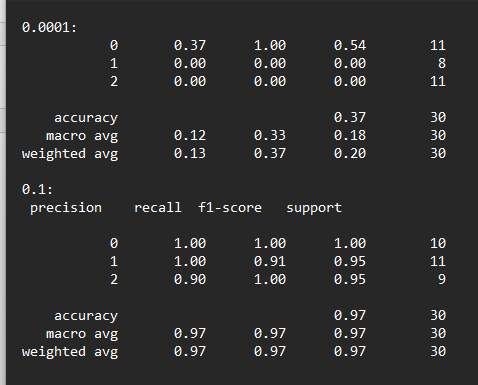

In [107]:
Image(filename = "Opdr 5.3 Results.png")

In [ ]:
# Hier zien we dat een snelle leersnelheid een negatief resultaat heeft op het model waardoor de accuracy flink naar beneden gaat.
# Er lijkt geen sprake te zijn van overfitting. De nauwkeurigheid op de testdata is consistent met de nauwkeurigheid op de trainingsdata.
# Presicion: hoevel van de voorpselde positieve resultaten daadwerkelijk positief zijn.
# Recall: hoeveel van de werkelijk positieve getallen juist zijn geidentificeerd door het model.
# F1-sscore: 2x (gemiddelde van precision en recall)
# Het classificatiemodel is betrouwbaarder bij een leersnelheid van 0.1 dan bij een leersnelheid van 0.0001 voor de Iris dataset.
# In de confusion matrix worden 4 verschillende uitkomsten weergegeven: TP, FP, TN, FN. Hieruit kan je zien hoe goed het model presteert in het classificeren an de verschillende klassen.
# In een confusion matrix kan je fouten identificeren, je kan de prestatie per klasse zien, de nauwkeurigheid en betrouwbaarheid en de optimalisatie en verbetering van het model zien. Het is dus belangrijke informatie over het model om te kunnen zien hoe goed het model daadwerkelijk is.

In [ ]:
# Opdracht 5.2 

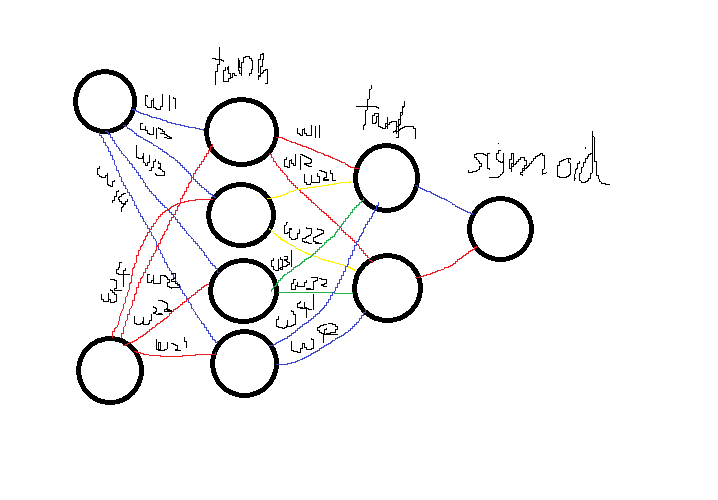

In [4]:
from IPython.display import Image
Image(filename = "Sketch Neural Network 2.png")

In [ ]:
# Dit model heeft 3 lagen 2 hidden layers en 1 output layer

In [6]:
# De gebruikte Optimizer is Adam. 
# Een optimizer is een algoritme dat de gewichten van het neurale netwerk aanpast om de verliesfunctie te minimaliseren.

In [ ]:
# De accuracy score van de train set is 0.999 en de accuracy score van de test set is 1.000 
# Dit betekent dat het model tijdens de train set goed kan classificeren en tijdens de test set kan het model ook goed
# classificeren met nieuwe data.

In [2]:
# Het verschil tussen in accuracy tussen de trainingset en de testset is klein. Ook zijn beide scores hoog.
# Dit betekent dat er waarschijnlijk geen sprake is van overfitting.

In [5]:
# Opdracht 5.4 

In [6]:
import pandas as pd

# Load the dataset
file_path = 'Datasets/mushroom_cleaned.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the neural network
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1, verbose=1)

Epoch 1/50
3891/3891 [==============================] - 2s 466us/step - loss: 0.4548 - accuracy: 0.7838 - val_loss: 0.4138 - val_accuracy: 0.8226
Epoch 2/50
3891/3891 [==============================] - 2s 459us/step - loss: 0.3290 - accuracy: 0.8567 - val_loss: 0.2973 - val_accuracy: 0.8732
Epoch 3/50
3891/3891 [==============================] - 2s 443us/step - loss: 0.2827 - accuracy: 0.8801 - val_loss: 0.2780 - val_accuracy: 0.8848
Epoch 4/50
3891/3891 [==============================] - 2s 453us/step - loss: 0.2646 - accuracy: 0.8897 - val_loss: 0.2479 - val_accuracy: 0.9031
Epoch 5/50
3891/3891 [==============================] - 2s 449us/step - loss: 0.2512 - accuracy: 0.8946 - val_loss: 0.2957 - val_accuracy: 0.8776
Epoch 6/50
3891/3891 [==============================] - 2s 479us/step - loss: 0.2433 - accuracy: 0.8990 - val_loss: 0.2292 - val_accuracy: 0.9024
Epoch 7/50
3891/3891 [==============================] - 2s 447us/step - loss: 0.2382 - accuracy: 0.8999 - val_loss: 0.2340 -

In [9]:
# Evaluate the model
results = model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

# Predictions and confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

338/338 [==============================] - 0s 338us/step - loss: 0.1550 - accuracy: 0.9449
Test Loss: 0.15497075021266937
Test Accuracy: 0.9449430704116821
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4909
           1       0.96      0.94      0.95      5898

    accuracy                           0.94     10807
   macro avg       0.94      0.95      0.94     10807
weighted avg       0.95      0.94      0.95     10807

[[4688  221]
 [ 374 5524]]
